In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
car_data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
car_data.shape

(205, 26)

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Converting string datatype columns into integer

In [13]:
from sklearn.preprocessing import LabelEncoder

In [22]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
labelencoder = LabelEncoder()
car_data['fueltype'] = labelencoder.fit_transform(car_data['fueltype'])
car_data['aspiration'] = labelencoder.fit_transform(car_data['aspiration'])
car_data['doornumber'] = labelencoder.fit_transform(car_data['doornumber'])
car_data['carbody'] = labelencoder.fit_transform(car_data['carbody'])
car_data['enginelocation'] = labelencoder.fit_transform(car_data['enginelocation'])
car_data['fuelsystem'] = labelencoder.fit_transform(car_data['fuelsystem'])
car_data['drivewheel'] = labelencoder.fit_transform(car_data['drivewheel'])
car_data['enginetype'] = labelencoder.fit_transform(car_data['enginetype'])
car_data['cylindernumber'] = labelencoder.fit_transform(car_data['cylindernumber'])

In [27]:
car_data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuelsystem
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,5
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,5
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,5
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,5
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,5
5,6,2,audi fox,1,0,1,3,1,0,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,5
6,7,1,audi 100ls,1,0,0,3,1,0,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,5
7,8,1,audi 5000,1,0,0,4,1,0,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,5
8,9,1,audi 4000,1,1,0,3,1,0,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,5
9,10,0,audi 5000s (diesel),1,1,1,2,0,0,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,5


In [29]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [30]:
car_data.drop(columns="CarName", inplace=True)
car_data.drop(columns="car_ID", inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuelsystem
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,5
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,5
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,5
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,5
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,5


In [35]:
x = (car_data.loc[:, car_data.columns != "price"])
y = (car_data.loc[:, car_data.columns == "price"])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [36]:
x_train

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuelsystem
66,0,0,0,0,3,2,0,104.9,175.0,66.1,...,134,3,3.43,3.64,22.0,72,4200,31,39,3
111,0,1,0,0,3,2,0,107.9,186.7,68.4,...,120,5,3.46,2.19,8.4,95,5000,19,24,5
153,0,1,0,0,4,1,0,95.7,169.7,63.6,...,92,1,3.05,3.03,9.0,62,4800,31,37,1
96,1,1,0,0,3,1,0,94.5,165.3,63.8,...,97,1,3.15,3.29,9.4,69,5200,31,37,1
38,0,1,0,1,2,1,0,96.5,167.5,65.2,...,110,0,3.15,3.58,9.0,86,5800,27,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,1,0,1,2,2,0,99.2,178.5,67.9,...,181,5,3.43,3.27,9.0,160,5200,19,25,5
14,1,1,0,0,3,2,0,103.5,189.0,66.9,...,164,5,3.31,3.19,9.0,121,4250,20,25,5
92,1,1,0,0,3,1,0,94.5,165.3,63.8,...,97,1,3.15,3.29,9.4,69,5200,31,37,1
179,3,1,0,1,2,2,0,102.9,183.5,67.7,...,171,5,3.27,3.35,9.3,161,5200,19,24,5


In [37]:
y_train

,price
66,18344.0
111,15580.0
153,6918.0
96,7499.0
38,9095.0
...,...
106,18399.0
14,24565.0
92,6849.0
179,15998.0


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

### Initializing model

In [63]:
network = Sequential()
network.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.20), input_shape=(x_train.shape[1],)))
network.add(layers.Dense(14, activation='relu', kernel_regularizer=regularizers.l2(0.20)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.20)))
network.add(layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l2(0.20)))
network.add(layers.Dense(1))

### model compilation

In [64]:
network.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [65]:
history = network.fit(x_train, y_train, batch_size=16, verbose=0, epochs=200)

In [66]:
epochs = range(1,201)

In [67]:
train_mae = history.history['mae']

In [68]:
train_mae

[12676.0693359375,
 12310.8828125,
 11952.2919921875,
 11578.8515625,
 11162.123046875,
 10674.62890625,
 10111.10546875,
 9482.154296875,
 8666.7724609375,
 7875.8232421875,
 7029.78564453125,
 6236.07421875,
 5623.81396484375,
 5250.5322265625,
 5079.0703125,
 5078.98583984375,
 5140.58740234375,
 5251.73193359375,
 5290.5390625,
 5321.25,
 5301.8857421875,
 5360.01806640625,
 5254.900390625,
 5292.74365234375,
 5246.85986328125,
 5271.6201171875,
 5158.912109375,
 5296.73681640625,
 5287.560546875,
 5261.41162109375,
 5314.162109375,
 5237.93505859375,
 5176.96044921875,
 5196.23583984375,
 5194.51123046875,
 5163.5166015625,
 5137.12158203125,
 5078.79052734375,
 5124.98681640625,
 5098.09375,
 5148.4423828125,
 5119.5927734375,
 5070.51513671875,
 5018.52099609375,
 5114.8837890625,
 5117.84375,
 5129.244140625,
 5039.7333984375,
 5069.14453125,
 4977.43359375,
 4974.49169921875,
 5012.00537109375,
 4973.24267578125,
 4932.76171875,
 4906.490234375,
 4896.54443359375,
 4827.511230

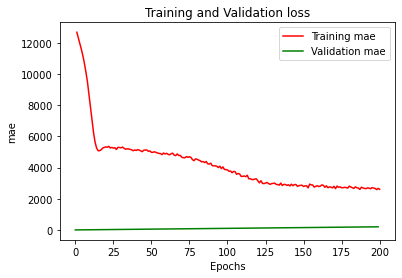

In [69]:
plt.plot(epochs, train_mae, 'r', label='Training mae')
plt.plot(epochs, 'g', label='Validation mae')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [70]:
y_test

,price
15,30760.000
9,17859.167
100,9549.000
132,11850.000
68,28248.000
95,7799.000
159,7788.000
162,9258.000
147,10198.000
182,7775.000


In [71]:
network.predict(x_test)

array([[23102.557 ],
       [19045.465 ],
       [10406.82  ],
       [14037.366 ],
       [28172.766 ],
       [ 7549.473 ],
       [ 9828.261 ],
       [ 8937.274 ],
       [11525.331 ],
       [ 8999.759 ],
       [13853.692 ],
       [ 9438.899 ],
       [15517.244 ],
       [13654.529 ],
       [34003.332 ],
       [ 7667.5713],
       [ 4267.957 ],
       [18376.512 ],
       [11440.58  ],
       [10661.006 ],
       [11681.664 ],
       [20956.121 ],
       [ 7484.777 ],
       [ 5691.0435],
       [ 7192.306 ],
       [24557.865 ],
       [14679.116 ],
       [17568.375 ],
       [ 7545.3403],
       [16418.209 ],
       [25954.395 ],
       [ 7107.357 ],
       [ 9774.115 ],
       [18590.771 ],
       [ 9020.448 ],
       [25894.027 ],
       [13422.893 ],
       [ 9673.637 ],
       [ 6727.6724],
       [19273.646 ],
       [10428.882 ]], dtype=float32)

In [72]:
test_mse_score, test_mae_score = network.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 16005407.0000 - mae: 2674.4614
